# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import seaborn as sns

In [10]:
# Sk learn imports!!
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge # ridge means Linear least squares with l2 regularization.


In [49]:
from sklearn.metrics import mean_squared_error

# Get the Data and Explore

In [4]:
HI18 = pd.read_csv('2018 Happiness Index.csv')

In [13]:
HI18

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


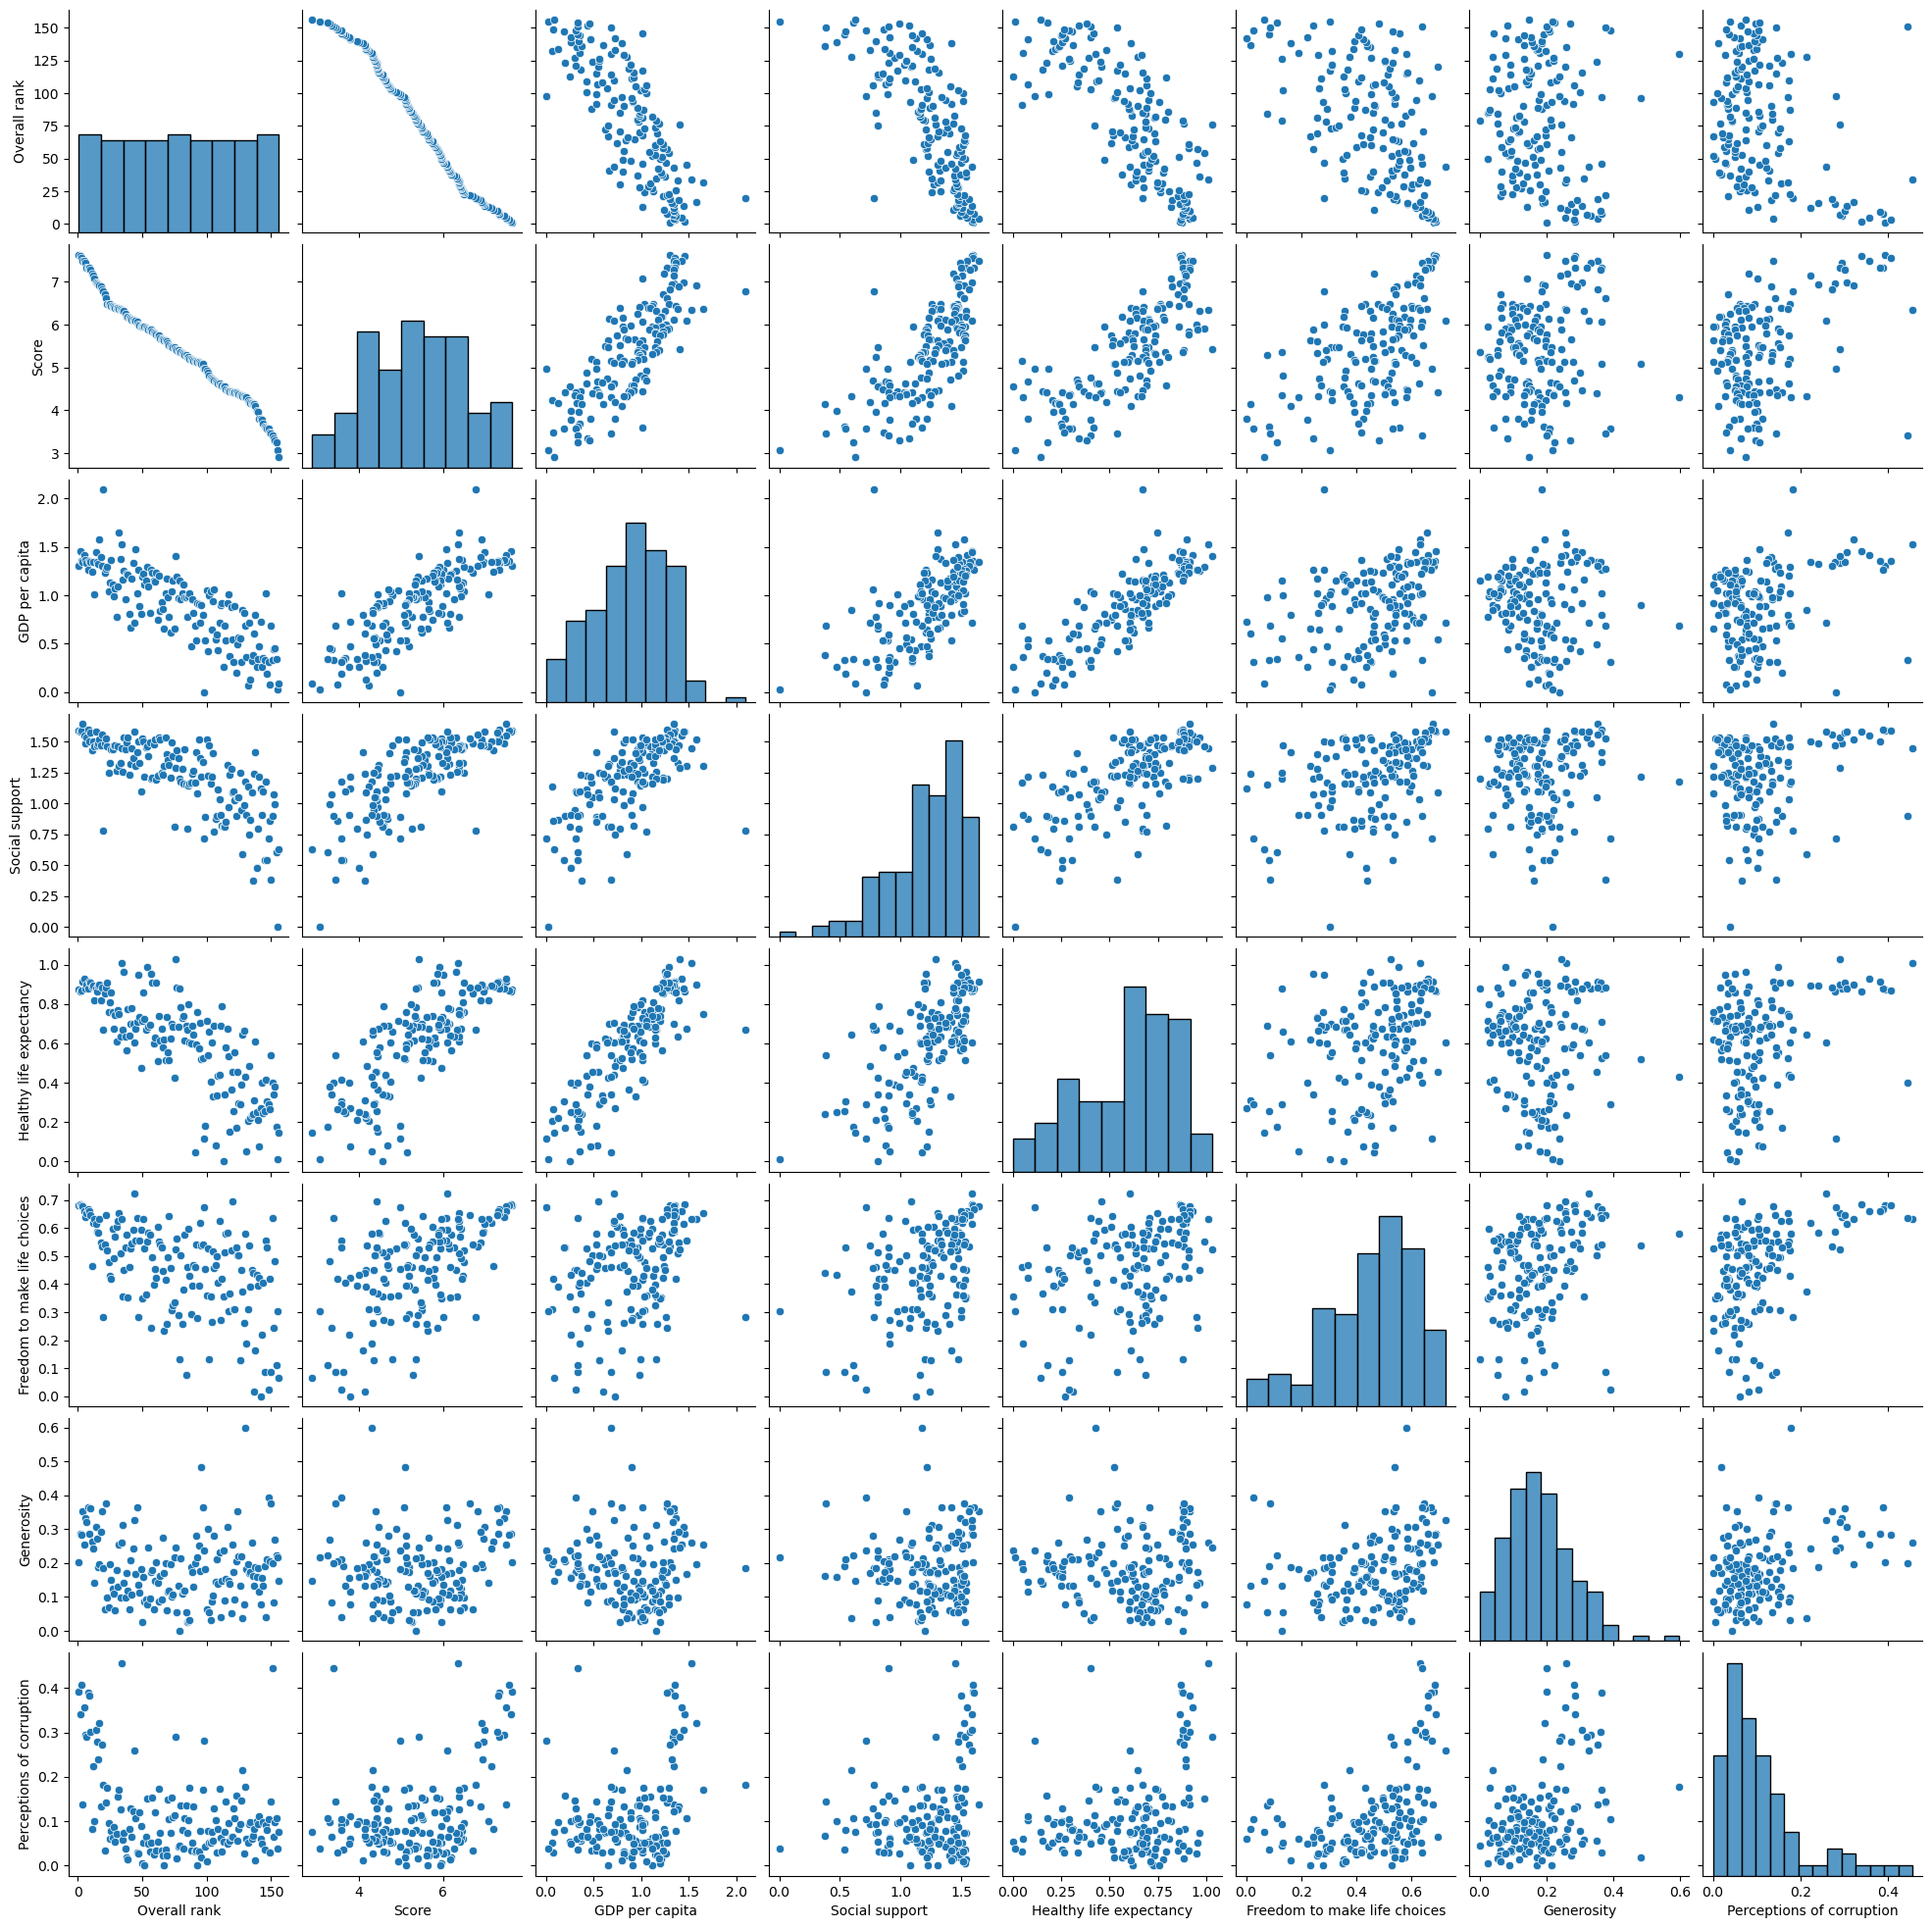

In [7]:
sns.pairplot(HI18)

In [8]:
HI19 = pd.read_csv('2019 Happiness Index.csv')
HI19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


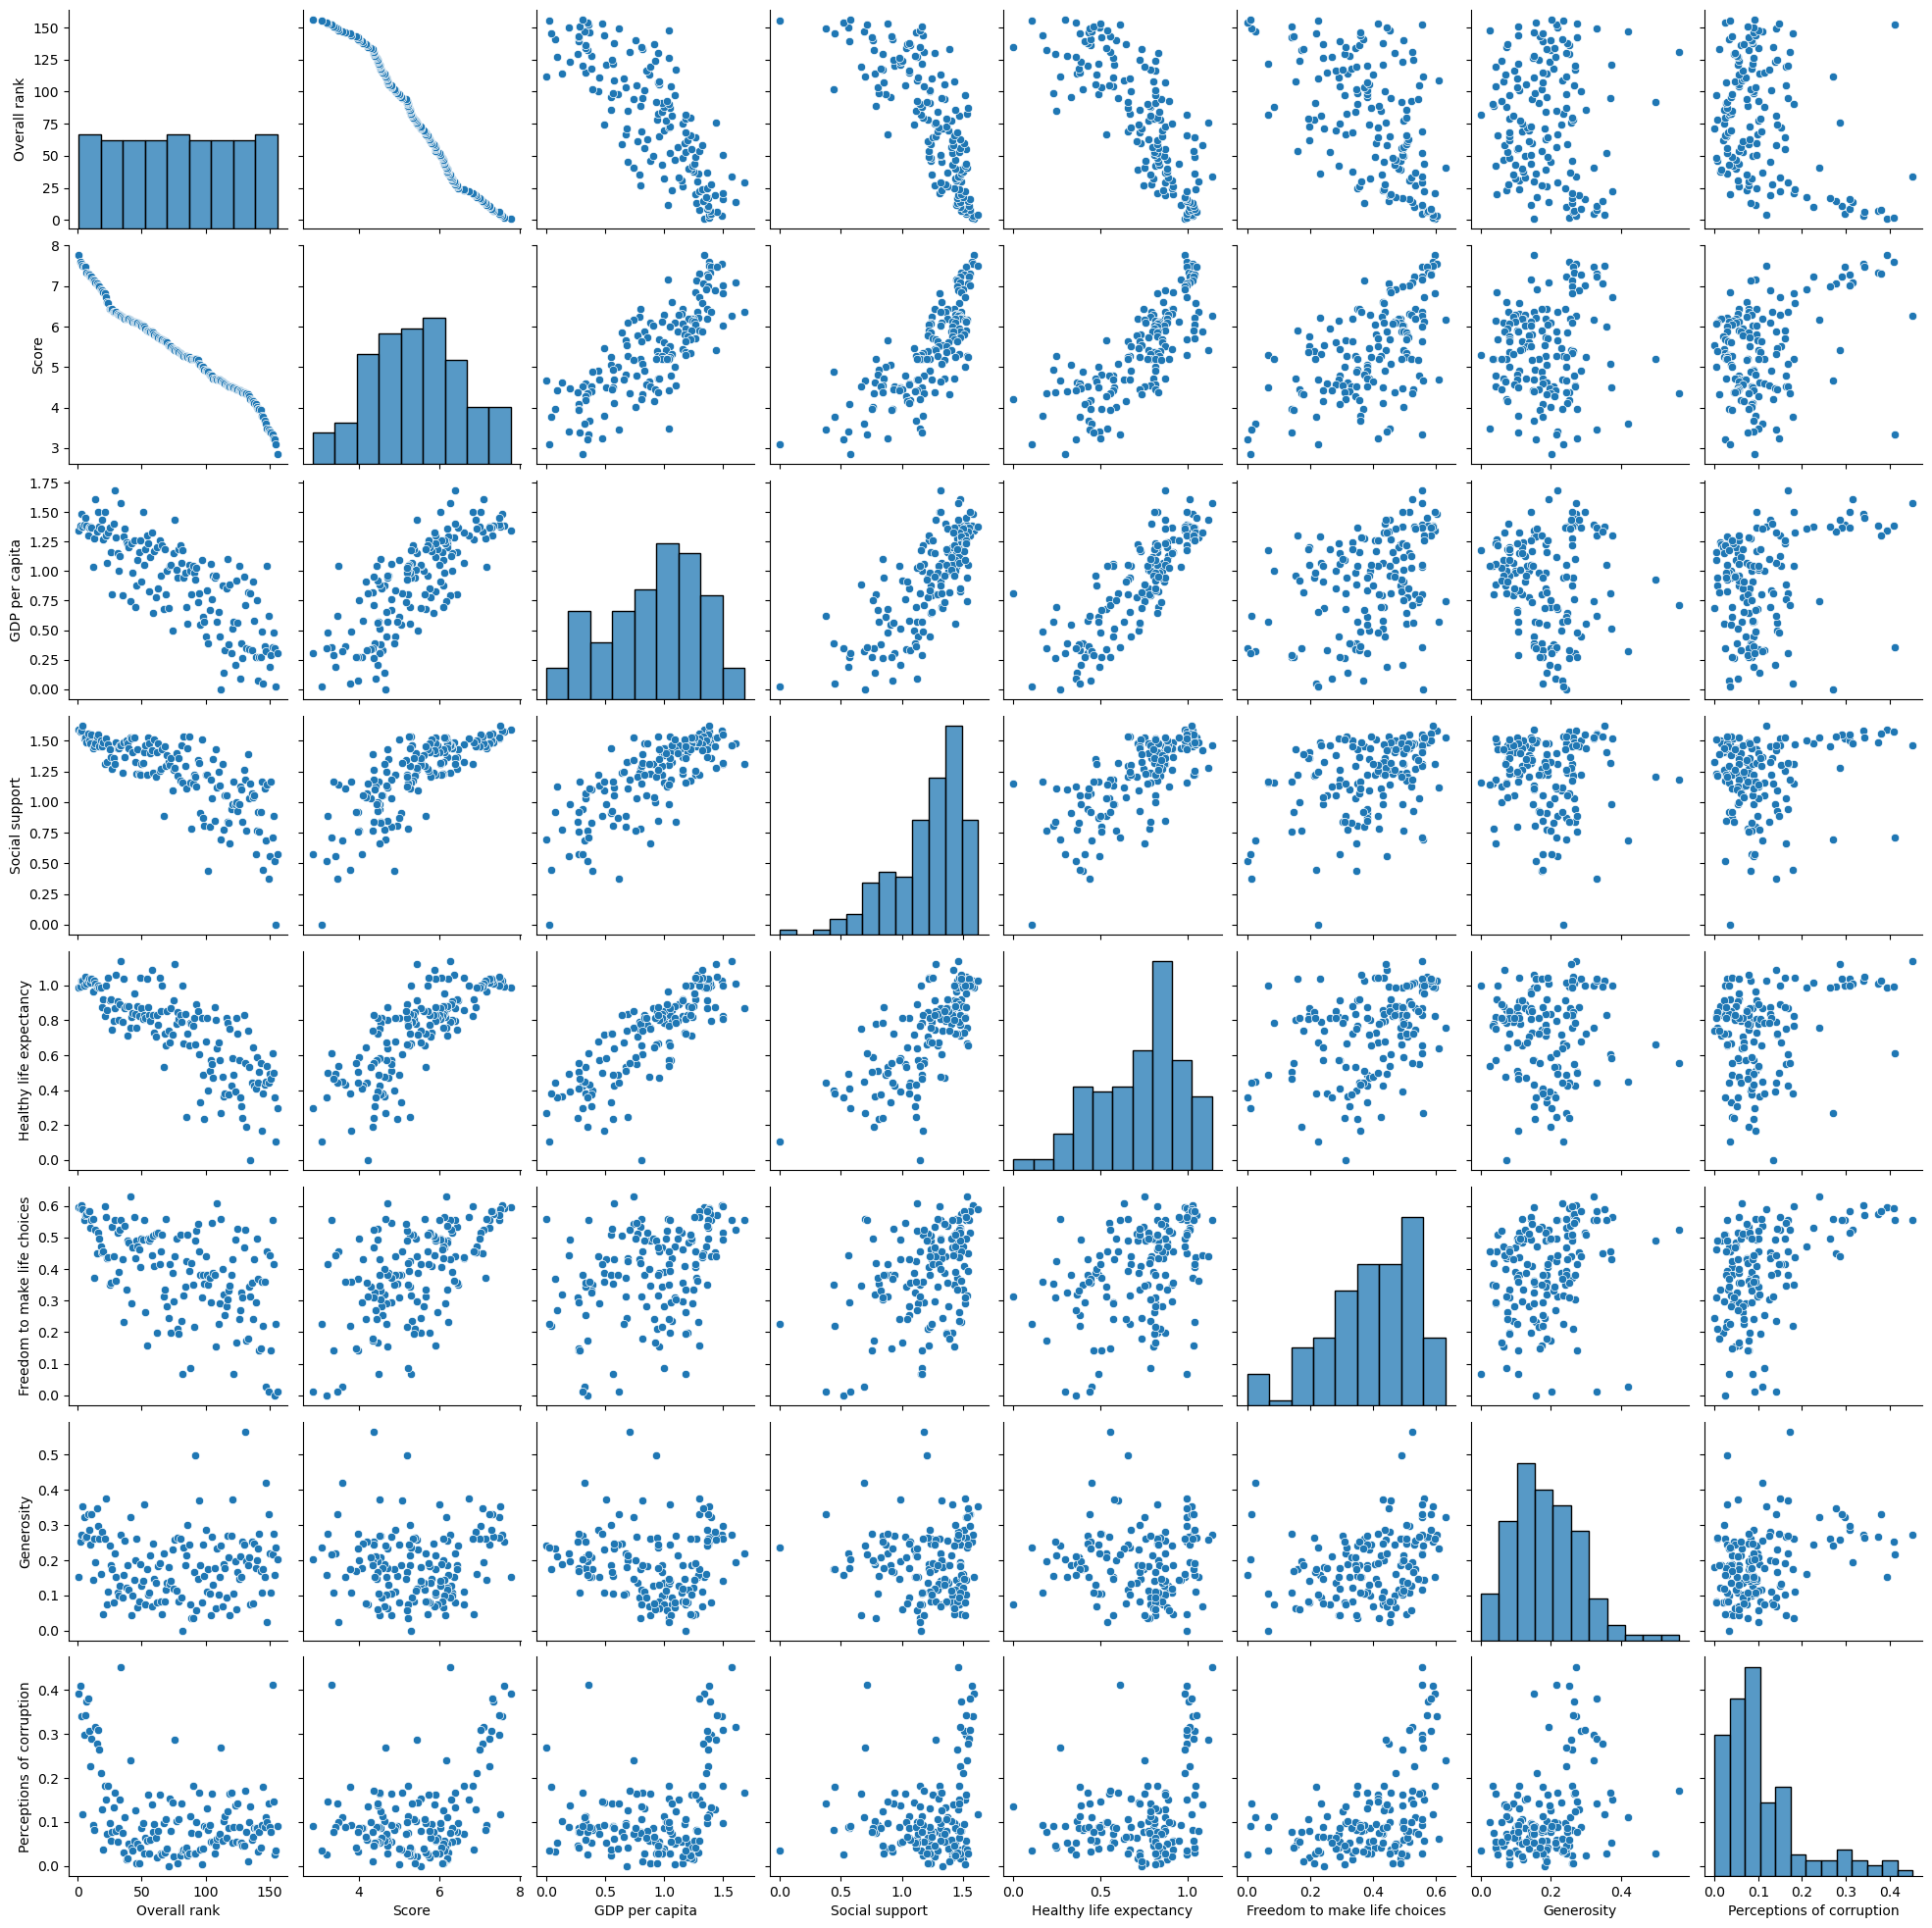

In [9]:
sns.pairplot(HI19)

## I found a great dataset!! 
Great because - 
1. Some features seem to have more pronounced relationship with Score while some have less. This will be helpful in experimenting with adding or subracting features 
2. It appears that some polynomial function can be fit into the model as well for predicting score, thus we can experiment with different complexity of model - ranging from simple (high bias) to complex (high variance) ones - in order to ultimately come up with the model that generalises best 
3. We can add the two datasets together, which will give us more training examples. Thus we can experiment with different number of training examples as well to see it's effect on the model


In [20]:
# Let's concatenate the two datasets
HI = pd.concat([HI18, HI19],ignore_index=True)
HI

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
307,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
308,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
309,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
310,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## Dataset Overview 

There are various numerical features in the dataset. The machine learning task here is to predict the Happiness Index Score (column named Score), based on the other features like GDP, social support, Perceptions of corruption etc!

We need to come up with an optimum model for predicting score after running various diagnostics!

In [15]:
# Explore the new data a bit

In [16]:
HI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     312 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 24.4+ KB


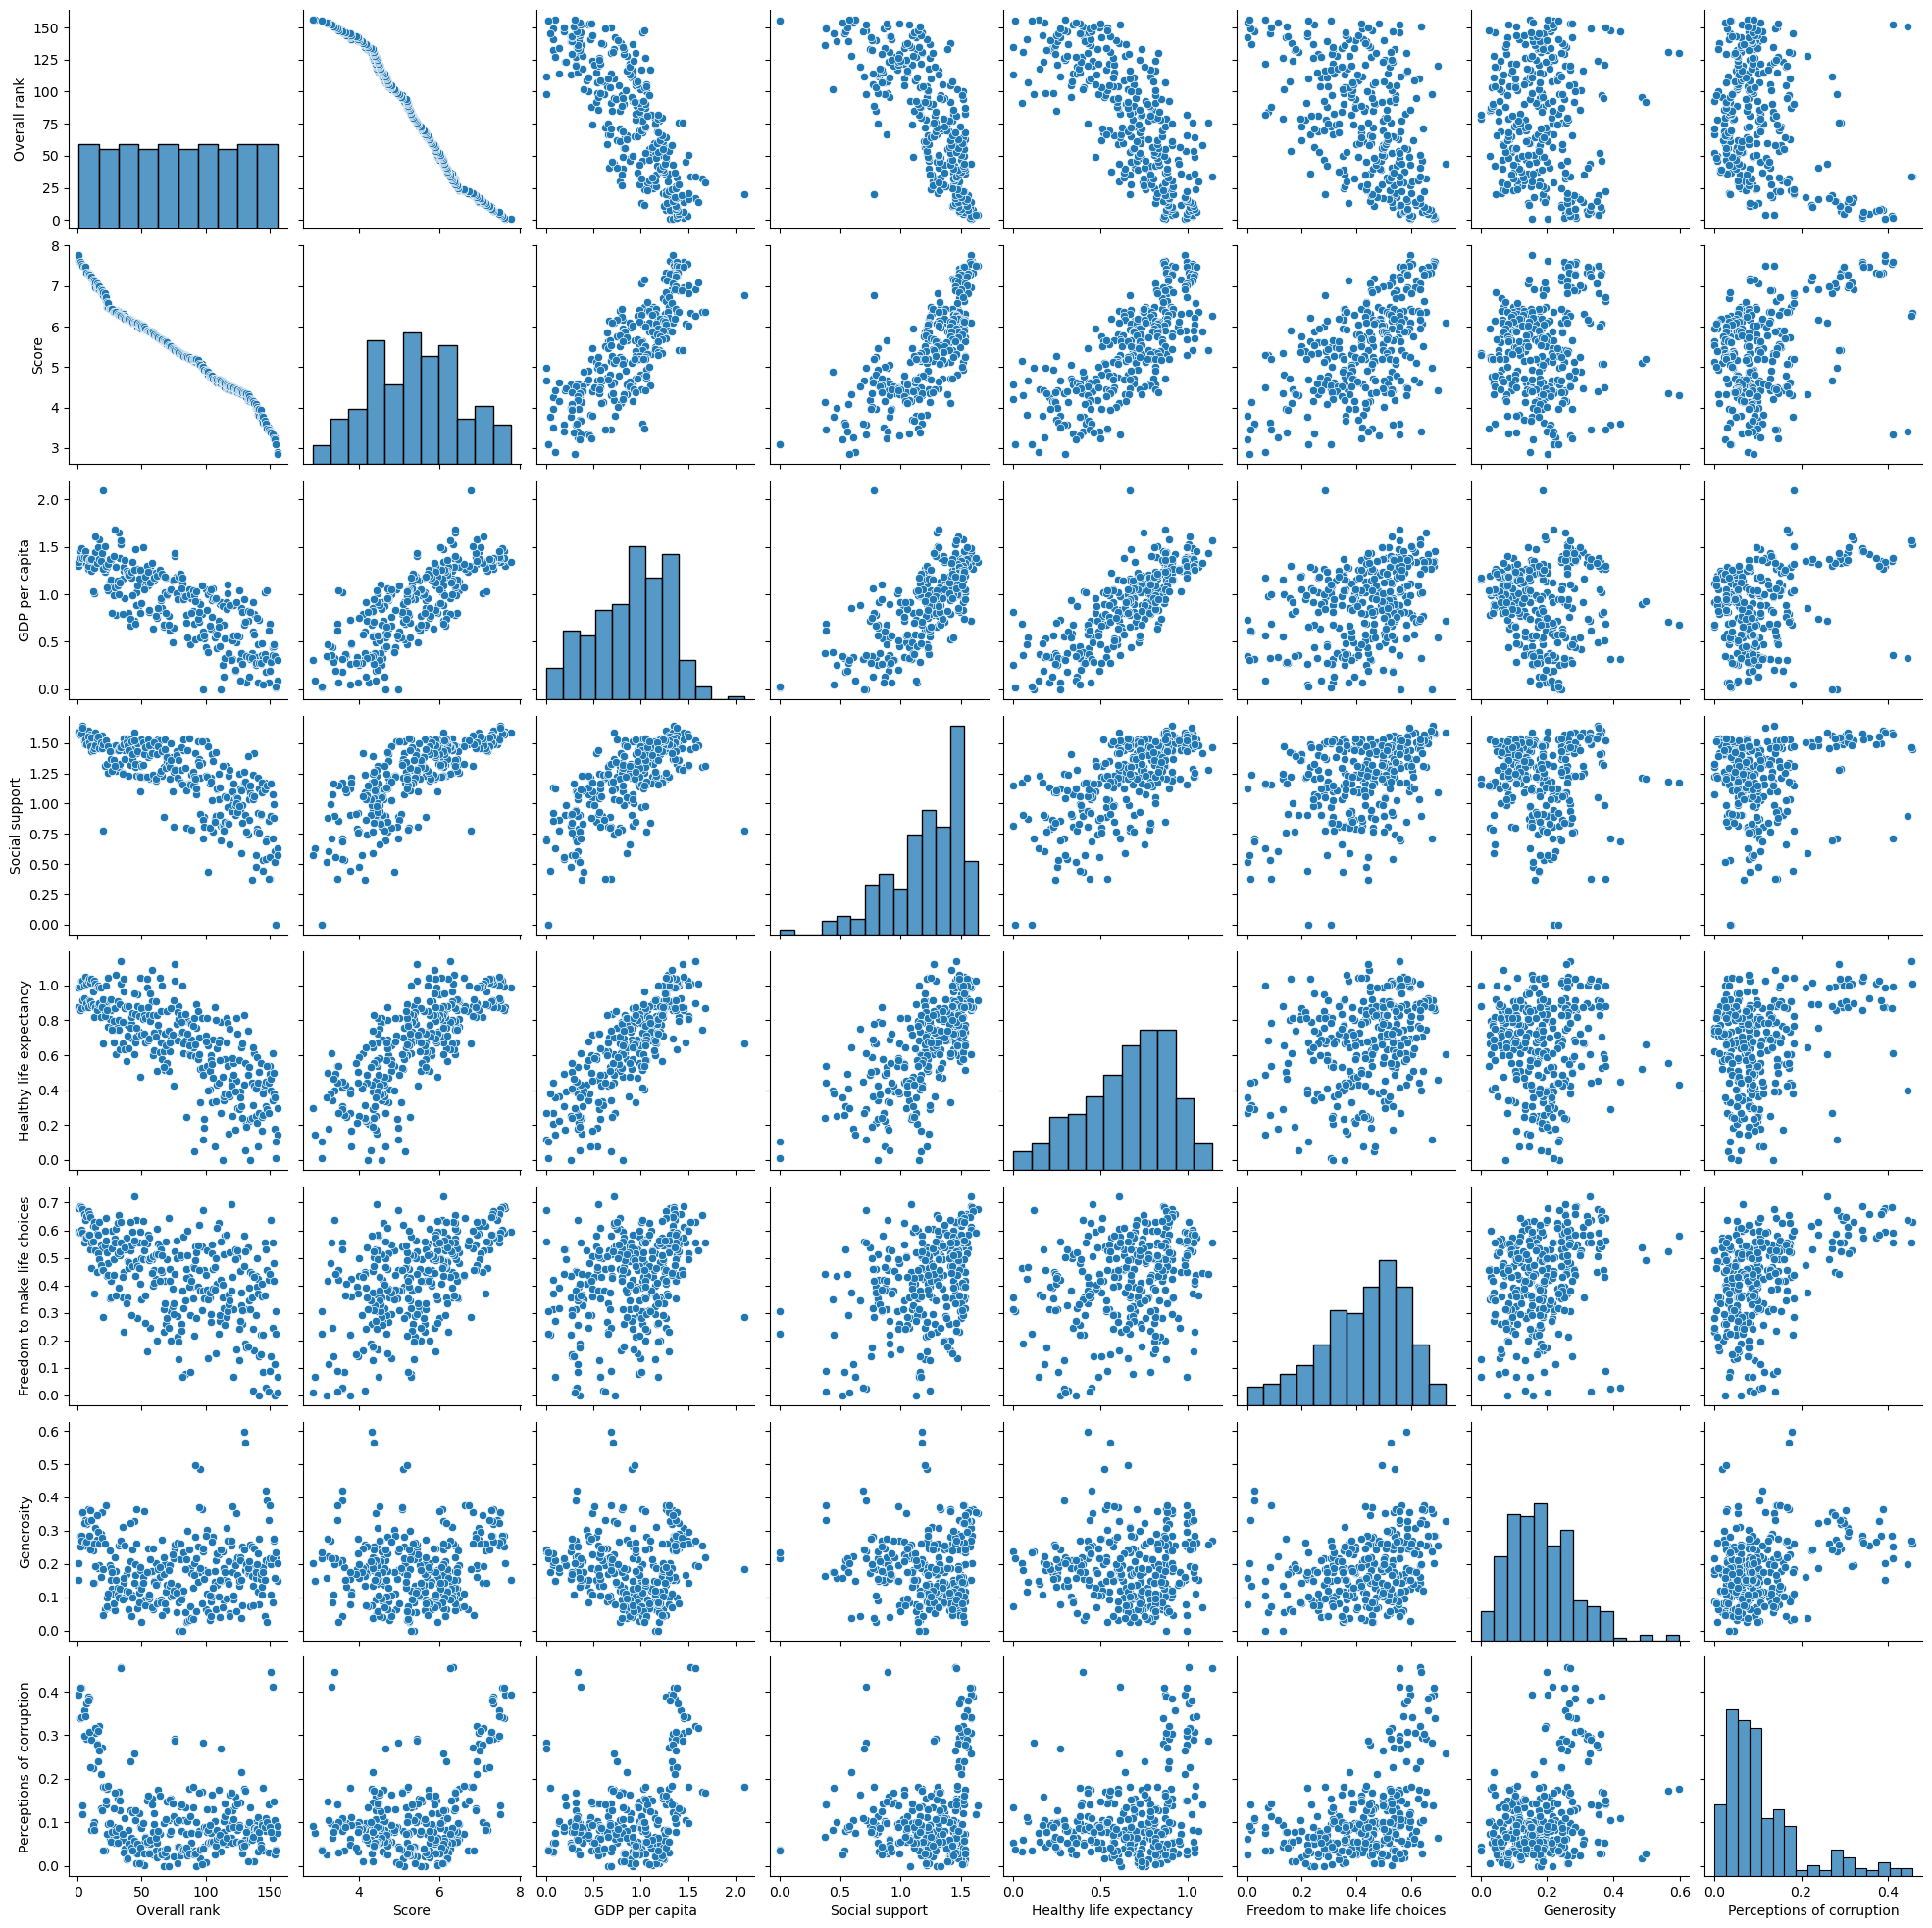

In [21]:
sns.pairplot(HI)

In [22]:
# Perfect! Now, let's get the data ready for further analysis

# Let's Run a Simple Linear Regression first before using Loop

We will code the machine learning algorithm using sklearn - Linear Regression class. 

We are doing this to get a feel for the process that will be followed and to test the simple model

After that we will be using loops to create multiple models and run diagnostics on them

In [24]:
# Let's set the X and y variables first

In [28]:
X = HI.drop(['Overall rank', 'Country or region', 'Score'],axis=1)
X.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.305,1.592,0.874,0.681,0.202,0.393
1,1.456,1.582,0.861,0.686,0.286,0.340
2,1.351,1.590,0.868,0.683,0.284,0.408
3,1.343,1.644,0.914,0.677,0.353,0.138
4,1.420,1.549,0.927,0.660,0.256,0.357


In [29]:
y = HI['Score']
y.head()

0    7.632
1    7.594
2    7.555
3    7.495
4    7.487
Name: Score, dtype: float64

In [30]:
X.shape, y.shape

((312, 6), (312,))

In [66]:
# Train - test - cross validation split 

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

In [67]:
del X_, y_

In [68]:
X_train.shape, y_train.shape

((187, 6), (187,))

In [69]:
X_cv.shape, y_cv.shape

((62, 6), (62,))

In [70]:
X_test.shape, y_test.shape

((63, 6), (63,))

In [71]:
# Normalise the features - X_train, X_cv and X_test

scaler = StandardScaler()

In [72]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.64317909, -1.11353726,  0.56444274, -0.77713436,  0.82179022,
         0.14816537],
       [-2.1130953 , -3.78321212, -2.51278195, -0.77713436,  0.31387132,
        -0.75194754],
       [ 0.07706697,  0.37983193, -0.65850591, -0.14915831, -1.13174402,
        -0.56571728],
       ...,
       [-0.78875156, -1.01841821, -2.23483907,  0.28257523, -0.38940101,
        -0.07944939],
       [-1.32668616, -0.43502133, -1.04365532, -1.10420523, -0.0866032 ,
         0.02401186],
       [ 0.47923712, -0.09259272, -0.94836062, -0.44352208, -1.50291553,
        -0.60710179]])

In [73]:
X_cv_scaled = scaler.transform(X_cv) #note we didn't use fit_transorm, cuz it's already fit as per X_train
X_test_scaled = scaler.transform(X_test)

In [74]:
# Let's run a simple linear Regression

In [75]:
linear_model = LinearRegression()

In [76]:
linear_model.fit(X_train_scaled,y_train)

LinearRegression()

In [77]:
# Model has been fit! Let's predict and then caluclate mean squared error

yhat = linear_model.predict(X_train_scaled)

In [78]:
train_error = mean_squared_error(y_train, yhat)
train_error

0.2790619865424072

In [79]:
yhat = linear_model.predict(X_cv_scaled)
cv_error = mean_squared_error(y_cv, yhat)
cv_error

0.23666542739772625

In [80]:
np.c_[y_cv, yhat][:5]

array([[6.198     , 5.96330399],
       [5.79      , 5.99758834],
       [7.167     , 6.19937742],
       [6.192     , 6.10393703],
       [4.796     , 5.27758374]])

Strangely, the model is performing better on cross validation set as compared to training set, as the error is lesser in cv set

In [81]:
# Let's try with test set

yhat = linear_model.predict(X_test_scaled)
test_error = mean_squared_error(y_test, yhat)
test_error

0.28972101944132067

Cross validation error being less than the training error -- Is this pointing towards some sort of bias problem - that the model is not able to fit the training the data too well? Thus arbitrarily, the cross validation error is coming as lesser than traing error?

Alright now!!

We have understood the implementation of the code for running the algorithm and getting our error rates for cv and train datasets.

Let's now create mutiple models that are more complex than the simple linear model above -
1. Adding polynomial features

# Error as a function of degree of Polynomial

Steps we are gonna follow in the for loop below -
1. add polynomial features
    - append the instance
2. normaise the data 
3. linear regression
    - append the model
4. make prediction and get error
    - train set
    - test set
    - simultaneosuly append the errors in a list


In [83]:
degrees = 10 #we will create models for upto 10 polynomials

In [127]:
poly_instances = []
linear_models = []
train_errors = []
cv_errors = []

for degree in range(degrees):
    poly = PolynomialFeatures(degree=degree+1,include_bias=False)
    poly_instances.append(poly)
    
    X_train_mapped = poly.fit_transform(X_train)
    X_cv_mapped = poly.fit_transform(X_cv)
    
    #normalise X
    scaler = StandardScaler()
    X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
    X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
    
    #linear model
    linear_model = LinearRegression()
    linear_model.fit(X_train_mapped_scaled, y_train)
    
    linear_models.append(linear_model)
    
    #make predictions and fetch errors. append simultaneously
    yhat = linear_model.predict(X_train_mapped_scaled)
    error_train = mean_squared_error(y_train, yhat)
    train_errors.append(error_train)
    
    yhat = linear_model.predict(X_cv_mapped_scaled)
    error_cv = mean_squared_error(y_cv, yhat)
    cv_errors.append(error_cv)
    

In [128]:
train_errors

[0.2790619865424073,
 0.19437941130139197,
 0.11204968461771121,
 1.9482050551169173e-24,
 1.070270876274827e-25,
 5.69004326855306e-26,
 4.544571252440242e-26,
 5.324533005133933e-26,
 2.689955889459632e-26,
 3.386868939341238e-26]

In [129]:
cv_errors

[0.23666542739772625,
 0.228584007104037,
 13.084104465974269,
 6302.200565857815,
 377.5947668117648,
 431.73490987279075,
 579.7802876071545,
 795.7387124874211,
 1062.4975736745632,
 1358.189116456909]

We can see above that as the degree of polynomials is increasing, -
1. train error is reducing
2. cv error is going up

Let's plot these

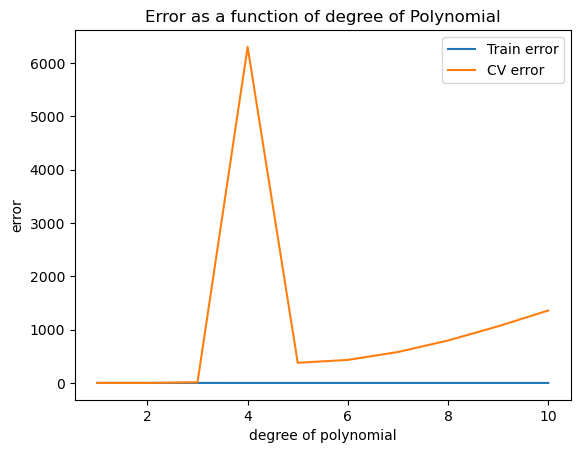

In [137]:
plt.plot(list(range(1,11)),train_errors,label='Train error')
plt.plot(list(range(1,11)),cv_errors,label='CV error')
plt.xlabel('degree of polynomial')
plt.ylabel('error')
plt.title('Error as a function of degree of Polynomial')
plt.legend()


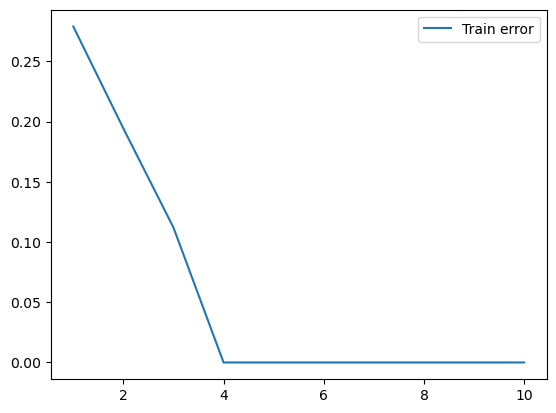

In [275]:
# Let's see the training error graphh idividually as we aren't able to gather much above

plt.plot(list(range(1,11)),train_errors, label = 'Train error')
plt.legend()

We can see that training error is going down and cross validation error is going up as degrees of polynomials increase

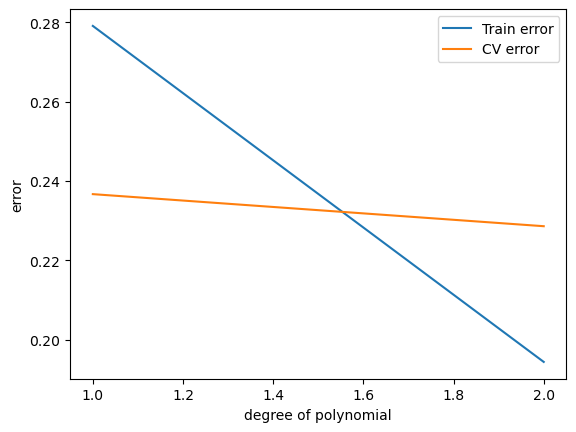

In [135]:
# Let's zoom in on first 2 polynmials

plt.plot([1,2],train_errors[:2],label='Train error')
plt.plot([1,2],cv_errors[:2],label='CV error')
plt.xlabel('degree of polynomial')
plt.ylabel('error')
plt.legend()

We can see that for some strange reason cv error was less than train error. The model seems to be doing decent till 2nd polinomial, after which it started overfitting - evident by a big gap between J_cv and J_train in the diagram above titled - 'Error as a function of degree of Polynomial'. This overfitting is indicative of a variance problem.

Thus we can conclude that the models with higher polynomials (above 2 degrees) have a variance problem

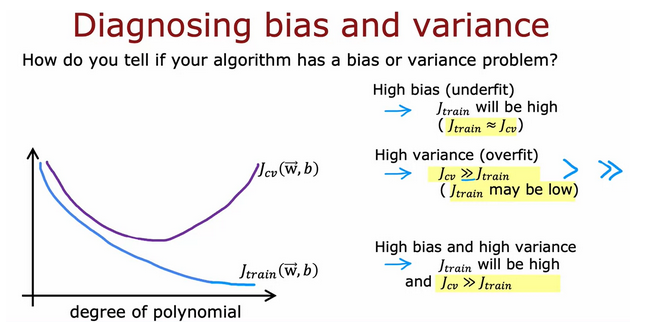

As per the image above, we can see that there seems to be a high variance problem beyond 2 polynomials.

Variance problem means -
1. J_cv >> J_train
2. This means that the model is overfitting the data. and would not be able to generalise well, as evident by poor performance in cross validation set

# Next Step - Regularisation

For the sake of experimentation, we will take the model with features to the polynomial 5. And we will use different regularisation terms on this model to create new models and see how the errors (J_cv and J_train) change accordingly

# Error as a function of Regularisation parameter

In [139]:
print('Current values of 5th polynomial with simple linear regression without regularisation:')
print('J_train: ',train_errors[4])
print('J_cv: ', cv_errors[4])

Current values of 5th polynomial with simple linear regression without regularisation:
J_train:  1.070270876274827e-25
J_cv:  377.5947668117648


In [142]:
#the model was
linear_models[4]

LinearRegression()

In [143]:
#the polynomial features instance was
poly_instances[4]

PolynomialFeatures(degree=5, include_bias=False)

**Steps to carry Out the Task**:

Outside loop - 
1. get X_train and X_cv mapped to 5th polynomial
2. Normalise - Scale the features

Inside loop (for each regularisation term)- 

3. linear regression with unique alpha
- append the model
4. make prediction and get error
- train set
- test set
- simultaneosuly append the errors in a list


## Get the Data Ready

In [247]:
# map to 5th polynomial
X_train_mapped5 = poly_instances[4].fit_transform(X_train)

In [248]:
X_cv_mapped5 = poly_instances[4].fit_transform(X_cv)

In [249]:
X_test_mapped5 = poly_instances[4].fit_transform(X_test)

In [ ]:
#scale the features

In [162]:
scaler = StandardScaler()

In [227]:
X_train_mapped5_scaled = scaler.fit_transform(X_train_mapped5)
X_cv_mapped5_scaled = scaler.transform(X_cv_mapped5)
X_test_mapped5_scaled = scaler.transform(X_test_mapped5)

In [165]:
X_train_mapped5_scaled.shape, X_cv_mapped5_scaled.shape

((187, 461), (62, 461))

We will be using Ridge from linear class of sklearn now. This is because we can set regularisation paramter with Ridge!

Let's set alpha to 0 to test the model first. We expect the model to give same result as simple linear regression above

## Regularisation term set to 0 - to test the model

In [168]:
linear_ridge = Ridge(alpha=0) #alpha as 0 - this is as good as simple linear regression

In [169]:
linear_ridge.fit(X_train_mapped5_scaled, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=6.6635e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


Ridge(alpha=0)

In [175]:
yhat = linear_ridge.predict(X_train_mapped5_scaled)
train_error_ridge = mean_squared_error(y_train, yhat)
print('Training error : ', train_error_ridge)

Training error :  3.6463805036661443e-16


In [176]:
yhat = linear_ridge.predict(X_cv_mapped5_scaled)
cv_error_ridge = mean_squared_error(y_cv, yhat)
print('CV error : ',cv_error_ridge)

CV error :  377.5947810857162


Awesome!! Keeping alpha as 0 is giving same result as simple linear regression without regularisation that we calculated above

In [177]:
print('LINEAR MODEL WITHOUT REGULARISATION')
print('J_train: ',train_errors[4])
print('J_cv: ', cv_errors[4])

print('LINEAR MODEL WITH REGULARISATION: ALPHA SET TO 0')
print('Training error : ',train_error_ridge)
print('CV error : ',cv_error_ridge)

LINEAR MODEL WITHOUT REGULARISATION
J_train:  1.070270876274827e-25
J_cv:  377.5947668117648
LINEAR MODEL WITH REGULARISATION: ALPHA SET TO 0
Training error :  3.6463805036661443e-16
CV error :  377.5947810857162


We can see that CV error is same in both instances

## Let's now loop over different value of alpha

In [213]:
ridge_models = []
J_train_ridges = []
J_cv_ridges = []
ridge_fitted_models = []

for alpha in np.linspace(0,5,11):
    linear_ridge = Ridge(alpha=alpha)
    ridge_models.append(linear_ridge)
    
    linear_ridge.fit(X_train_mapped5_scaled, y_train)
    ridge_fitted_models.append(linear_ridge)
    
    yhat = linear_ridge.predict(X_train_mapped5_scaled)
    train_error_ridge = mean_squared_error(y_train,yhat)
    J_train_ridges.append(train_error_ridge)
    
    yhat = linear_ridge.predict(X_cv_mapped5_scaled)
    cv_error_ridge = mean_squared_error(y_cv, yhat)
    J_cv_ridges.append(cv_error_ridge)
    

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=6.6635e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


In [214]:
J_train_ridges

[3.6463805036661443e-16,
 0.1341942591363668,
 0.14385614311156034,
 0.14944602439395202,
 0.15344706514722,
 0.15659219635010488,
 0.1591935478741824,
 0.16141395136656725,
 0.16335017759598844,
 0.1650651144168337,
 0.1666023263208004]

In [215]:
J_cv_ridges

[377.5947810857162,
 0.1786025019207901,
 0.16367859318044384,
 0.16269780904876063,
 0.16715591681201306,
 0.17362674347756782,
 0.18064195287386262,
 0.18755064423231899,
 0.19406951184886123,
 0.20008891868462692,
 0.20558317178039617]

Text(0.5, 1.0, 'Training error as a function of regularisation parameter')

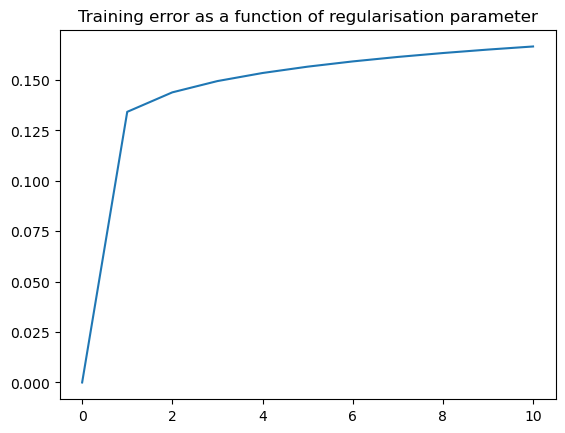

In [217]:
# Let's plot these

plt.plot(J_train_ridges)
plt.title('Training error as a function of regularisation parameter')

Text(0.5, 1.0, 'CV error as a function of regularisation parameter')

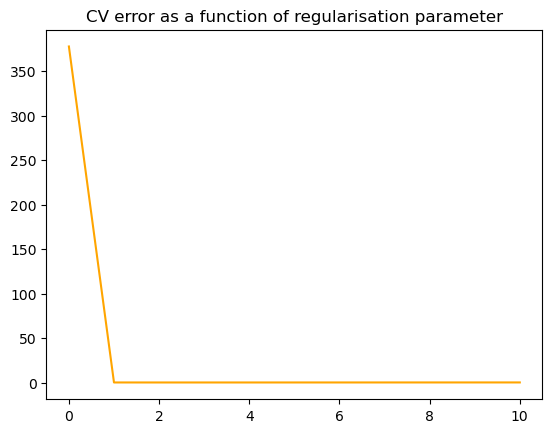

In [218]:
plt.plot(J_cv_ridges,color='orange')
plt.title('CV error as a function of regularisation parameter')

Text(0.5, 1.0, 'Error as a function of regularisation parameter')

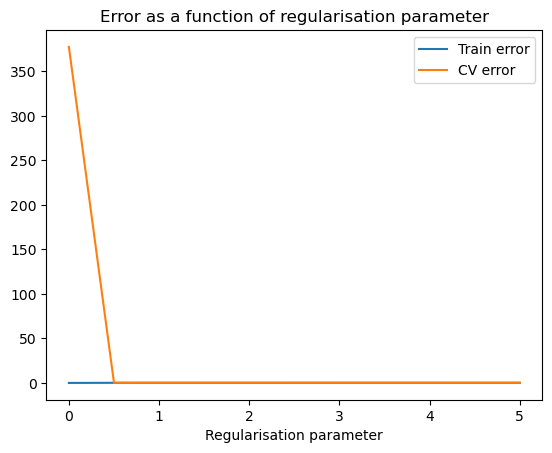

In [219]:
plt.plot(np.linspace(0,5,11),J_train_ridges, label='Train error')
plt.plot(np.linspace(0,5,11),J_cv_ridges, label='CV error')
plt.xlabel('Regularisation parameter')
plt.legend()
plt.title('Error as a function of regularisation parameter')


Text(0.5, 1.0, 'Error as a function of regularisation parameter')

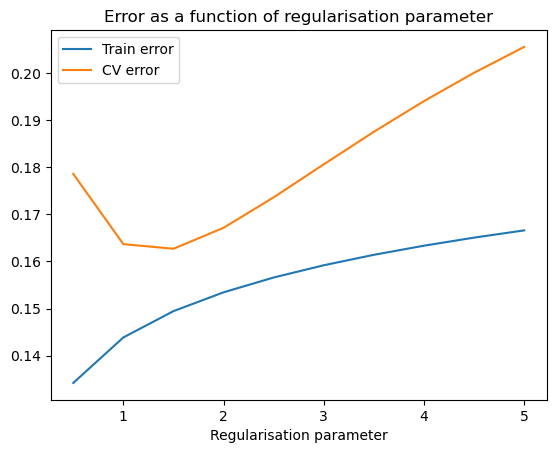

In [220]:
# It's not very clear from above graph. Let's zoom in from 1 alpha onwards

plt.plot(np.linspace(0,5,11)[1:],J_train_ridges[1:], label='Train error')
plt.plot(np.linspace(0,5,11)[1:],J_cv_ridges[1:], label='CV error')
plt.xlabel('Regularisation parameter')
plt.legend()
plt.title('Error as a function of regularisation parameter')


## Observations

We can have a few observations from the graph above -
1. There is a drop in J_cv inititally and after a certain point, increasing the regularisation parameter is increasing J_cv
2. Training error keeps on increasing with higher levels of regularisation parameter (lambda! Here we are calling it alpha)

The theory behind it is explained in the diagram below

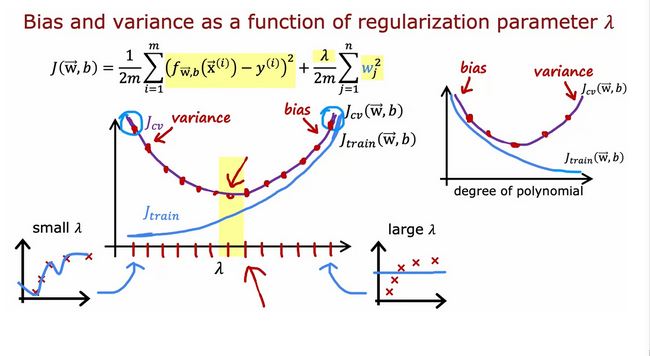

The model with the lowest cross validation error is considered the best performing model. Thus, let's see which one is that

In [221]:
lowest_cv_index = np.argmin(J_cv_ridges)
lowest_cv_index

3

In [222]:
#third index of J_cv_ridges has lowest cv error

J_cv_ridges[lowest_cv_index]

0.16269780904876063

This is the lowest cross validation error we have achieved so far. Well done!!

So, we can say that we have found a decent model so far! The details of this model are given below -

In [223]:
print("Linear model used: ", ridge_models[lowest_cv_index])
print("polynomial features used: ", poly_instances[4]) #selection of this was arbitrary, although this model did give better J_train
print(" ")
print('Errors found for this model')
print('J train: ', J_train_ridges[lowest_cv_index])
print('J cv: ', J_cv_ridges[lowest_cv_index])

Linear model used:  Ridge(alpha=1.5)
polynomial features used:  PolynomialFeatures(degree=5, include_bias=False)
 
Errors found for this model
J train:  0.14944602439395202
J cv:  0.16269780904876063


In [229]:
# Let's test the model on the test set to get the real estimate of generalisation error

yhat = ridge_fitted_models[lowest_cv_index].predict(X_test_mapped5_scaled)
J_test_ridge = mean_squared_error(y_test, yhat)
print('Generalisation Error of the Selected Model so far')
print('J test: ', J_test_ridge)

Generalisation Error of the Selected Model so far
J test:  0.25028700454429775


This seems to be a decent enough generalisation error!!

## Important Side Note

One of the ways to judge the model's performance is to ask the question - **Does the model have a variance problem? Or does the model have more of a bias problem?** Accordingly, we take next steps in changing the model with the goal to either reduce the variance or to reduce the bias!

For us to understand if the model has more of a **bias problem** - 
- We need access to the *baseline performance*. And then we judge the current model's performance relative to the baseline performance. This baseline performance can be ascertained through -
    - Human level performance
    - Competing algorithms performance
    - Educated guess
- Since it's a notebook for educational purpose we are not going to go through the trouble of understanding what could be a baseline performance for this type of dataset
- Thus it is difficult for us to judge whether the model has a bias problem.

However, it is easy to grasp whether the model has **variance problem** -
- This is evident *when the gap between training error and cross validation error is too big*.
- We saw this gap between the two errors with both the graphs above - 
    - Error as function of polynomials - as polynomial increased, variance of the models went up
    - Error as a function of regularisation - with lesser values for regularisation, variance was high.(And as the regularisation term increased in magnitude, the bias of the models went up)

# Final Step - Error as a Function of Training Examples

- Usually getting more training examples fixes the variance problem. The follwing screenshot clears this phenomenon -
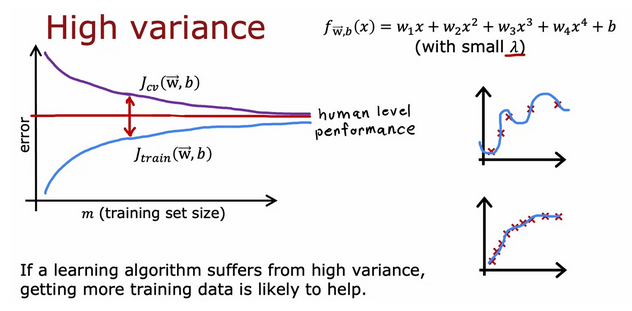

- We will thus be taking a high variance model (the same model as above - features upto 5 polynomials)
- Then we will try to experiment with different number of training examples and see -
    - error as a function of number of training examples

**Steps to complete the task** :
1. take the X_train_mapped5

Loop:

2. Create random batches of 25, 50, 75 and so on training example (loop with if)
    - append the number of training examples in a list
3. scale X_train_mapped5 with it's lesser number of training examples using fit and transform. transform X_cv_mapped5 and X_test_mapped5 after that
4. fit linear regression model with small regulariser (ridge. alpha=0.3)
5. make prediction and get error
    - train set
    - cv set
    - simultaneosuly append the errors in a list

In [267]:
num_examples = []
scalers = []
lm_ridges = []
J_train_examples = []
J_cv_examples = []

for i in range(1,187):
    if i % 25 == 0:
        #create batch for x
        random_batch = np.random.randint(0,187,i)
        X_train_mapped5_rand = X_train_mapped5[random_batch]
        y_train_rand = y_train.iloc[random_batch]
        
        num_examples.append(len(X_train_mapped5_rand)) #number of training examples as batch
        
        #Normalise
        scaler_ = StandardScaler()
        
        X_train_mapped5_rand_scaled = scaler_.fit_transform(X_train_mapped5_rand)
        scalers.append(scaler_) #appending the fitted scaler, which will be used while using test set
        
        X_cv_mapped5_rand_scaled = scaler_.transform(X_cv_mapped5)
        
        #fit linear model ridge
        lm_ridge = Ridge(alpha=0.3) #small lambda or alpha
        
        lm_ridge.fit(X_train_mapped5_rand_scaled, y_train_rand)
        
        lm_ridges.append(lm_ridge)
        # prediction and errors
        yhat = lm_ridge.predict(X_train_mapped5_rand_scaled)
        J_train_ex = mean_squared_error(y_train_rand, yhat)
        J_train_examples.append(J_train_ex)
        
        yhat = lm_ridge.predict(X_cv_mapped5_rand_scaled)
        J_cv_ex = mean_squared_error(y_cv, yhat)
        J_cv_examples.append(J_cv_ex)
        
        

In [268]:
num_examples

[25, 50, 75, 100, 125, 150, 175]

In [269]:
J_train_examples

[0.007845447264931839,
 0.03202178173156997,
 0.036616093259585876,
 0.0642671871979741,
 0.08801485057387749,
 0.09462107718633847,
 0.0954073924659191]

In [270]:
J_cv_examples

[3.079583963515331,
 2.3744757881720804,
 0.49652252258511437,
 1.1198305855662891,
 0.8427946546517272,
 0.4652006585826852,
 0.5247714911035073]

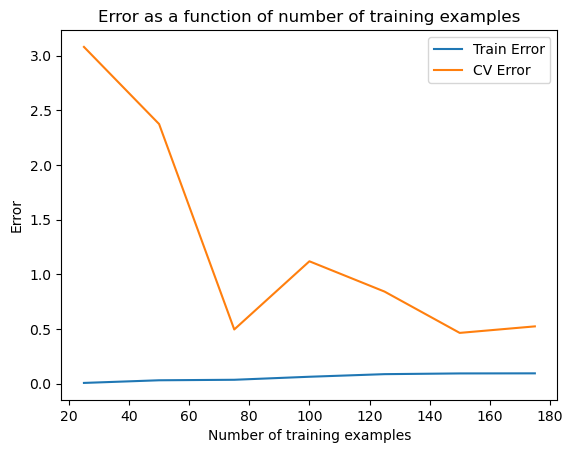

In [271]:
# Let's plot these

plt.plot(num_examples, J_train_examples, label='Train Error')
plt.plot(num_examples, J_cv_examples, label='CV Error')
plt.title('Error as a function of number of training examples')
plt.xlabel('Number of training examples')
plt.ylabel('Error')

plt.legend()

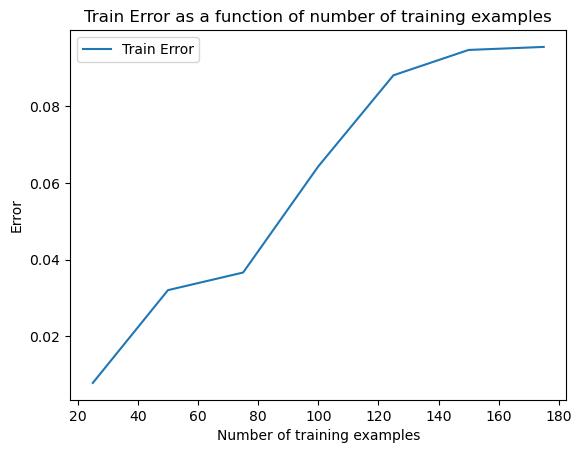

In [274]:

plt.plot(num_examples, J_train_examples, label='Train Error')
plt.title('Train Error as a function of number of training examples')
plt.xlabel('Number of training examples')
plt.ylabel('Error')

plt.legend()

## Observations -
We can see that as the number of training examples increase -
1. J train goes up. This is obvious because the model would have to fit more number of examples and thus may miss fitting a few examples when the number of examples are higher
2. J cv goes down!

One way to see this is that indeed the model had a high variance problem when the training examples were 25 in number. But as we increased the number of training examples to 50, 75... the variance problem went down as the gap between two errors reduced.

## Selecting a Model
From all the above models, we will be selecting the model with the least cross validation error. So the summary of that model is -

In [277]:
least_cv_index = np.argmin(J_cv_examples)
least_cv_index

5

In [281]:
print('MODEL SUMMARY')
print('Linear Model: ', lm_ridges[least_cv_index])
print('J train: ', J_train_examples[least_cv_index])
print('J cv: ', J_cv_examples[least_cv_index])

MODEL SUMMARY
Linear Model:  Ridge(alpha=0.3)
J train:  0.09462107718633847
J cv:  0.4652006585826852


In [283]:
# let's predict on test set and get test error

X_test_mapped5_rand_scaled = scalers[least_cv_index].transform(X_test_mapped5)

yhat = lm_ridges[least_cv_index].predict(X_test_mapped5_rand_scaled)
J_test_ex = mean_squared_error(y_test, yhat)
print('J Test: ', J_test_ex)

J Test:  0.4289876802533729


We can see the **generalisation error is too high!!** Of course, it can't be that good when the cross validation error itself is not that great. Although we chose the model with the least cross validation error from the available models, this was not good enough enough. We have already found models above that give us better cross validation error comparative to training error.

Surely, **there is a big variance issue here**. In order to reduce the variance, a few strategies we can follow as next steps include - 
1. Getting even more training examples
2. Increasing regularisation parameter (lambda)
3. Reducing the number of features (lesser polynomials of the features or lesser features in general)

Bottom line is that we would need to *simplify the model and/or increase training examples*.

Some of this we have already done before. That's why we are not going to do it again. This was just for educational purpose and to get the intuition of the algorithm and specifically what should be the thought process while deciding what to do next!

# Final Optional Step

The final step someone can choose to do is to **experiment with different number of features.**

In the current notebook, we used all the features in all the models. We can expermiment with creating models with just one or few features like 'GDP per capita', 'Social support', 'Healthy life expectancy', and compare them with models having different combination of features (for example, 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption')

I think it would make more sense to include those features that are having close relation with score, as evident by seaborn plot in the start of this notebook. However, it's worth experimenting with different set of features to reveal interesting insights. 

These things I am keeping open for experimentation!! I am ending my exploration here!! 